# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).
24%7=3

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [28]:
N = 2 
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Exercise_Hours'

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.float_format', lambda x: f"{x:.4f}")

DATA_PATH = '/Users/victoriasamsonova/bsu/oiad/oiad-11-2025/datasets/teen_phone_addiction_dataset.csv'

df = pd.read_csv(DATA_PATH)
column_name = cols[N % 7]
series = df[column_name].dropna().astype(float)
len(df), column_name, series.describe()


(3000,
 'Exercise_Hours',
 count   3000.0000
 mean       1.0407
 std        0.7346
 min        0.0000
 25%        0.5000
 50%        1.0000
 75%        1.5000
 max        4.0000
 Name: Exercise_Hours, dtype: float64)

## I. Описательная статистика и графики (сырые данные)
Будем анализировать столбец `Exercise_Hours` (так как выбран столбец №3).


Среднее: 1.0406666666666666
Дисперсия (выборочная): 0.5396661109258641
Мода (оценка по бинам): 0.06666666666666667
Медиана: 1.0
Квантили 0.25, 0.5, 0.75:
 0.2500   0.5000
0.5000   1.0000
0.7500   1.5000
Name: Exercise_Hours, dtype: float64
Эксцесс: -0.2574880012747749
Асимметрия: 0.4386385025085598
IQR: 1.0


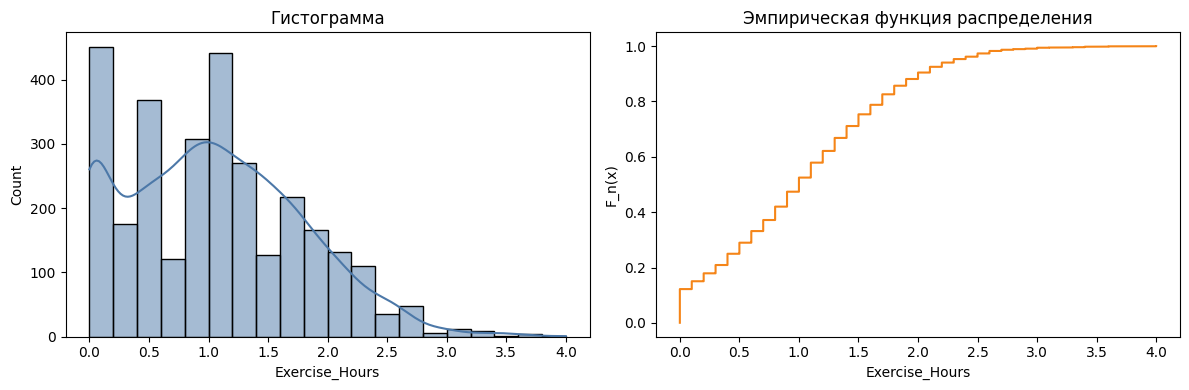

In [30]:
# Функции для моды (устойчивая к непрерывным данным)
from collections import Counter

def robust_mode(x: np.ndarray, bins: int = 30):
    x = x[~np.isnan(x)]
    hist, bin_edges = np.histogram(x, bins=bins)
    idx = np.argmax(hist)
    return (bin_edges[idx] + bin_edges[idx + 1]) / 2

# Вычисления
mean_val = series.mean()
var_val = series.var(ddof=1)
median_val = series.median()
quantiles = series.quantile([0.25, 0.5, 0.75])
excess_kurtosis = stats.kurtosis(series, fisher=True, bias=False)
skewness = stats.skew(series, bias=False)
iqr_val = stats.iqr(series, rng=(25, 75))
mode_val = robust_mode(series.to_numpy(), bins=30)

print('Среднее:', mean_val)
print('Дисперсия (выборочная):', var_val)
print('Мода (оценка по бинам):', mode_val)
print('Медиана:', median_val)
print('Квантили 0.25, 0.5, 0.75:\n', quantiles)
print('Эксцесс:', excess_kurtosis)
print('Асимметрия:', skewness)
print('IQR:', iqr_val)

# Гистограмма и ЭФР
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(series, bins=20, kde=True, ax=axes[0], color='#4c78a8')
axes[0].set_title('Гистограмма')
axes[0].set_xlabel(column_name)

# Эмпирическая функция распределения (ECDF)
sorted_vals = np.sort(series)
ecdf = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
axes[1].step(sorted_vals, ecdf, where='post', color='#f58518')
axes[1].set_title('Эмпирическая функция распределения')
axes[1].set_xlabel(column_name)
axes[1].set_ylabel('F_n(x)')
plt.tight_layout()
plt.show()


## II. Проверка нормальности (сырые данные)


n = 3000
Skewness = 0.4386, Z = 9.808
Excess Kurtosis = -0.2575, Z = -2.879


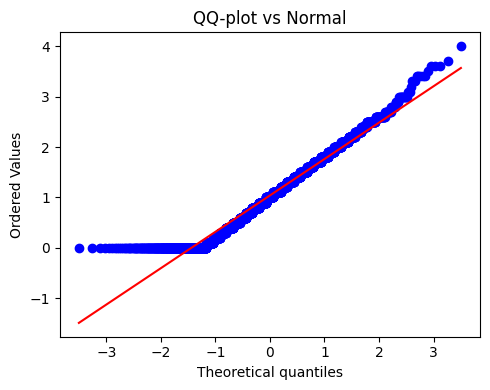

Chi-square stat: 70.672
df: 5
p-value: 7.427392034742297e-14


In [31]:
# Тест асимметрии и эксцесса (Z-статистики)
n = len(series)
skew = stats.skew(series, bias=False)
kurt = stats.kurtosis(series, fisher=True, bias=False)

# Оценка стандартных ошибок
se_skew = np.sqrt(6 / n)
se_kurt = np.sqrt(24 / n)

z_skew = skew / se_skew
z_kurt = kurt / se_kurt

print(f"n = {n}")
print(f"Skewness = {skew:.4f}, Z = {z_skew:.3f}")
print(f"Excess Kurtosis = {kurt:.4f}, Z = {z_kurt:.3f}")

# Q-Q plot
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
stats.probplot(series, dist="norm", plot=ax)
ax.set_title('QQ-plot vs Normal')
plt.tight_layout()
plt.show()

#1) интервалы по квантилям нормального распределения с параметрами выборки
mu_hat = series.mean()
sigma_hat = series.std(ddof=1)

# количество корзин 
num_bins = 8
prob_edges = np.linspace(0, 1, num_bins + 1)
# теоретические границы по Н(μ, σ^2)
from scipy.stats import norm
bin_edges = norm.ppf(prob_edges, loc=mu_hat, scale=sigma_hat)

# частоты наблюдений по этим границам
obs_counts, _ = np.histogram(series, bins=bin_edges)

# теоретические вероятности (равные по определению)
expected_probs = np.diff(prob_edges)
exp_counts = expected_probs * n

# статистика хи-кв: sum ((O - E)^2 / E)
chi2_stat = ((obs_counts - exp_counts) ** 2 / exp_counts).sum()

# число степеней свободы: k - 1 - p, где p = 2 (μ и σ оценены)
dof = num_bins - 1 - 2
p_value = 1 - stats.chi2.cdf(chi2_stat, dof)

print('Chi-square stat:', chi2_stat)
print('df:', dof)
print('p-value:', p_value)


### Вывод по разделу II

Распределение данных не является нормальным, так как существуют статистически значимые показатели асимметрии и эксцесса, указывающие на отклонение от нормальности.
Хи-квадрат тест также подтверждает, что наблюдаемое распределение отличается от ожидаемого нормального.
QQ-график (предполагая, что он показывает отклонения) дополнительно поддерживает эти выводы, так как графика x = y нет



## III. Обработка данных и повторная проверка


In [32]:
# техники: усечение выбросов, стандартизация, лог-трансформация
s = series.copy()

# усечение выбросов 
q1, q3 = np.percentile(s, [25, 75])
iqr = q3 - q1
lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
s_clip = s.clip(lower=lo, upper=hi)

# стандартизация
s_clip_z = (s_clip - s_clip.mean()) / s_clip.std(ddof=1)

# логарифмирование (сдвиг для неотрицательности)
shift = 1 - s.min() if s.min() <= 0 else 0
s_log = np.log(s + shift + 1e-6)

variants = {
    'original': s,
    'clipped': s_clip,
    'clipped_z': s_clip_z,
    'log': s_log,
}

rows = []
for name, vec in variants.items():
    vec = pd.Series(vec).dropna()
    n_i = len(vec)
    mean_i = vec.mean()
    var_i = vec.var(ddof=1)
    skew_i = stats.skew(vec, bias=False)
    kurt_i = stats.kurtosis(vec, fisher=True, bias=False)

    # хи-квадрат по равновероятностным бинам нормали с μ,σ выборки
    mu_i, sigma_i = mean_i, vec.std(ddof=1)
    num_bins = 8
    prob_edges = np.linspace(0, 1, num_bins + 1)
    bin_edges = stats.norm.ppf(prob_edges, loc=mu_i, scale=sigma_i)
    obs_counts, _ = np.histogram(vec, bins=bin_edges)
    exp_counts = np.diff(prob_edges) * n_i
    chi2_i = ((obs_counts - exp_counts) ** 2 / exp_counts).sum()
    dof_i = num_bins - 1 - 2
    p_i = 1 - stats.chi2.cdf(chi2_i, dof_i)

    rows.append([name, n_i, mean_i, var_i, skew_i, kurt_i, chi2_i, dof_i, p_i])

summary = pd.DataFrame(rows, columns=['variant','n','mean','var','skew','excess_kurt','chi2','dof','p_value'])
summary


,variant,n,mean,var,skew,excess_kurt,chi2,dof,p_value
0,original,3000,1.0407,0.5397,0.4386,-0.2575,70.6720,5,0.0000
1,clipped,3000,1.0382,0.5288,0.3670,-0.5357,125.2533,5,0.0000
2,clipped_z,3000,0.0000,1.0000,0.3670,-0.5357,125.2533,5,0.0000
3,log,3000,0.6453,0.1416,-0.2491,-0.8469,252.8747,5,0.0000


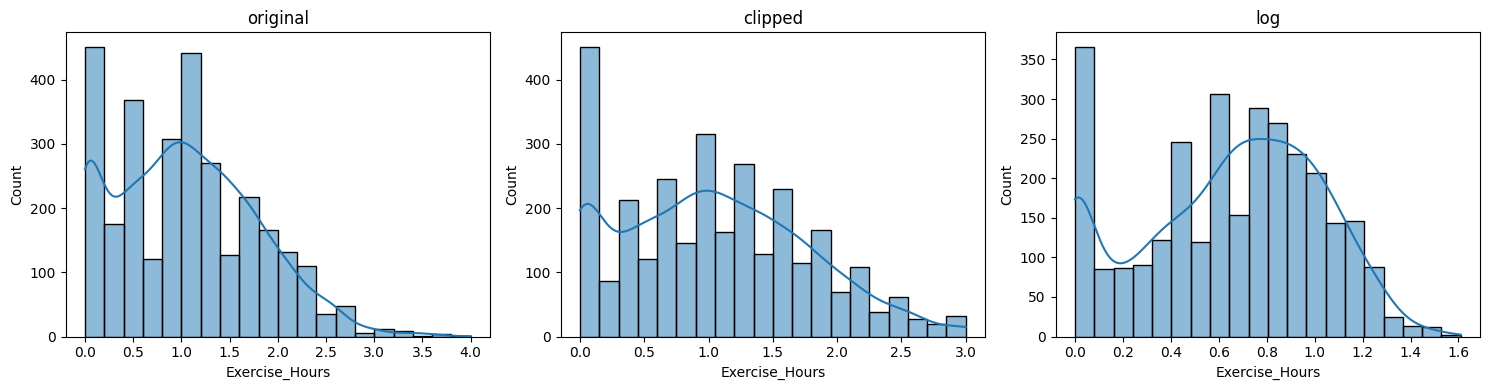

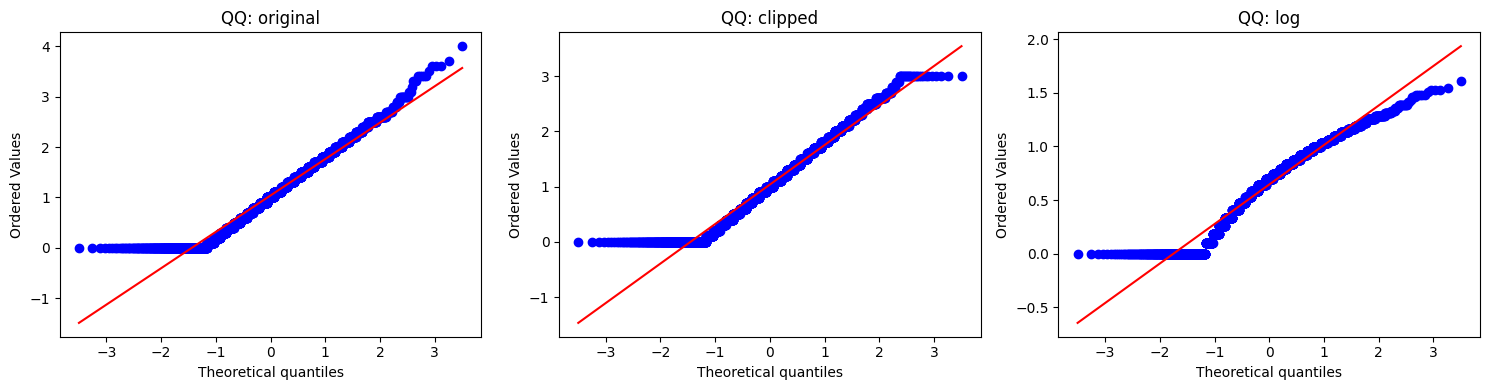

In [17]:
# визуализация гистограмм после преобразований
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, vec) in zip(axes, [('original', s), ('clipped', s_clip), ('log', s_log)]):
    sns.histplot(vec, bins=20, kde=True, ax=ax)
    ax.set_title(name)
plt.tight_layout()
plt.show()

# QQ-плоты
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, vec) in zip(axes, [('original', s), ('clipped', s_clip), ('log', s_log)]):
    stats.probplot(vec, dist='norm', plot=ax)
    ax.set_title(f'QQ: {name}')
plt.tight_layout()
plt.show()


### Вывод по разделу III

Несмотря на изменения, внесённые в данные через усечение выбросов, стандартизацию и логарифмирование, ни один из вариантов не достиг нормального распределения.
Между распределением признака и нормальным распределением не существует функциональной зависимости(а если и существует, то найти ее почти невозможно)


## IV. Групповой анализ по School_Grade

Ниже строим гистограммы по группам `School_Grade` и считаем среднее и дисперсию внутри каждой группы.



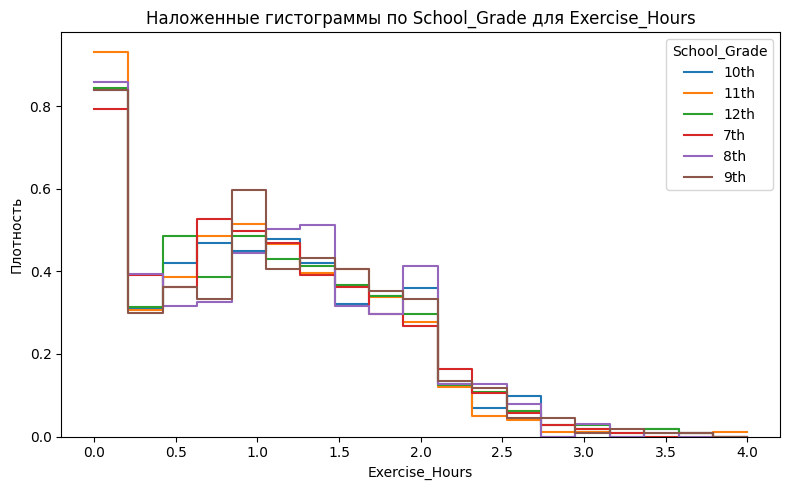

Групповые статистики (count, mean, var):
              count   mean    var
School_Grade                     
10th            487 1.0425 0.5365
11th            479 0.9795 0.4867
12th            529 1.0459 0.5642
7th             497 1.0296 0.5324
8th             482 1.0620 0.5517
9th             526 1.0802 0.5617


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных по группам
grp = df[["School_Grade", column_name]].dropna()
unique_grades = sorted(grp["School_Grade"].unique())

# Наложенные гистограммы (нормированные) для каждой группы
fig, ax = plt.subplots(figsize=(8, 5))

# Общие интервалы по всему диапазону значений
xmin, xmax = grp[column_name].min(), grp[column_name].max()
bins = np.linspace(xmin, xmax, 20)
palette = sns.color_palette("tab10", n_colors=len(unique_grades))

for color, grade in zip(palette, unique_grades):
    vals = grp.loc[grp["School_Grade"] == grade, column_name]
    sns.histplot(vals, bins=bins, stat="density", element="step", fill=False,
                 ax=ax, color=color, label=str(grade), linewidth=1.5)

ax.set_title(f"Наложенные гистограммы по School_Grade для {column_name}")
ax.set_xlabel(column_name)
ax.set_ylabel("Плотность")
ax.legend(title="School_Grade")
plt.tight_layout()
plt.show()

# Среднее и дисперсия внутри каждой группы
group_stats = (
    grp.groupby("School_Grade")[column_name]
       .agg(["count", "mean", "var"])
       .sort_index()
)

print("Групповые статистики (count, mean, var):")
print(group_stats)

### Вывод по разделу IV
8 и 9 классы: Эти группы демонстрируют более широкий диапазон значений, что может говорить о том, что ученики этих классов занимаются физической активностью с разной интенсивностью.
10 и 12 классы: Распределения имеют более высокие пики, что может указывать на большую концентрацию учеников, проводящих около 1 часа на упражнения.
11 класс: Гистограмма имеет более низкую плотность, что может указывать на меньшую активность или различия в подходах к физической активности.




In [23]:
# V. автоматические выводы по нормальности и группам
from scipy import stats
import numpy as np
import pandas as pd

alpha = 0.05

try:
    variants  
except NameError:
    s = df[column_name].dropna().astype(float)
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    s_clip = s.clip(lower=lo, upper=hi)
    s_clip_z = (s_clip - s_clip.mean()) / s_clip.std(ddof=1)
    shift = 1 - s.min() if s.min() <= 0 else 0
    s_log = np.log(s + shift + 1e-6)
    variants = {
        'original': s,
        'clipped': s_clip,
        'clipped_z': s_clip_z,
        'log': s_log,
    }

rows = []
for name, vec in variants.items():
    vec = pd.Series(vec).dropna()
    n_i = len(vec)
    # Z-статистики асимметрии и эксцесса
    skew_i = stats.skew(vec, bias=False)
    kurt_i = stats.kurtosis(vec, fisher=True, bias=False)
    z_skew_i = skew_i / np.sqrt(6 / n_i)
    z_kurt_i = kurt_i / np.sqrt(24 / n_i)
    # хи-квадрат с равновероятностными бинами нормали
    mu_i, sigma_i = vec.mean(), vec.std(ddof=1)
    num_bins = 8
    prob_edges = np.linspace(0, 1, num_bins + 1)
    bin_edges = stats.norm.ppf(prob_edges, loc=mu_i, scale=sigma_i)
    obs_counts, _ = np.histogram(vec, bins=bin_edges)
    exp_counts = np.diff(prob_edges) * n_i
    chi2_i = ((obs_counts - exp_counts) ** 2 / exp_counts).sum()
    dof_i = num_bins - 1 - 2
    p_i = 1 - stats.chi2.cdf(chi2_i, dof_i)

    normal_by_z = (abs(z_skew_i) < 1.96) and (abs(z_kurt_i) < 1.96)
    normal_by_chi = (p_i > alpha)

    rows.append({
        'variant': name,
        'n': n_i,
        'skew': skew_i,
        'excess_kurt': kurt_i,
        'z_skew': z_skew_i,
        'z_kurt': z_kurt_i,
        'chi2': chi2_i,
        'df': dof_i,
        'p_value': p_i,
        'normal_z': normal_by_z,
        'normal_chi2': normal_by_chi,
        'normal_overall': (normal_by_z and normal_by_chi)
    })

auto = pd.DataFrame(rows).set_index('variant')
print("автоматические выводы по нормальности (варианты -> метрики):")
display(auto[["n","skew","excess_kurt","z_skew","z_kurt","chi2","df","p_value","normal_z","normal_chi2","normal_overall"]])

# итог по лучшему варианту
if (auto["normal_overall"]).any():
    best = auto[auto["normal_overall"]].sort_values("p_value", ascending=False).iloc[0]
    print(f"лучший вариант, близкий к нормальному: {best.name} (p={best.p_value:.3f})")
else:
    # иначе выбрать с максимальным p-value
    best = auto.sort_values("p_value", ascending=False).iloc[0]
    print(f"ни один вариант не прошел оба критерия;")
    print(f"самый близкий: {best.name} (p={best.p_value:.3f})")

# краткий комментарий по группам
try:
    gs = group_stats.copy()
    span_mean = gs["mean"].max() - gs["mean"].min()
    span_var = gs["var"].max() - gs["var"].min()
    print(f"разброс средних между группами: {span_mean:.3f};")
    print(f"разброс дисперсий: {span_var:.3f}.")
except Exception:
    pass



автоматические выводы по нормальности (варианты -> метрики):


,n,skew,excess_kurt,z_skew,z_kurt,chi2,df,p_value,normal_z,normal_chi2,normal_overall
variant,,,,,,,,,,,
original,3000,0.4386,-0.2575,9.8083,-2.8788,70.6720,5,0.0000,False,False,False
clipped,3000,0.3670,-0.5357,8.2059,-5.9893,125.2533,5,0.0000,False,False,False
clipped_z,3000,0.3670,-0.5357,8.2059,-5.9893,125.2533,5,0.0000,False,False,False
log,3000,-0.2491,-0.8469,-5.5696,-9.4681,252.8747,5,0.0000,False,False,False


ни один вариант не прошел оба критерия;
самый близкий: original (p=0.000)
разброс средних между группами: 0.101;
разброс дисперсий: 0.078.
